In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÏÇ¨ÏÉÅÍµ¨"
region_code = "11"
target_date = "2015-01-15"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÏÇ¨ÏÉÅÍµ¨2015_1q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2015-01-15   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   8160    ÏÇ¨ÏÉÅÍµ¨   8162    ÏÇ¨ÏÉÅÍµ¨   
1   2015-01-15     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6062    ÏÇ¨ÏÉÅÍµ¨   6250    ÏÇ¨ÏÉÅÍµ¨   
2   2015-01-15    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   4500    ÏÇ¨ÏÉÅÍµ¨   4690    ÏÇ¨ÏÉÅÍµ¨   
3   2015-01-15     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2900    ÏÇ¨ÏÉÅÍµ¨   3000    ÏÇ¨ÏÉÅÍµ¨   
4   2015-01-15    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   6800    ÏÇ¨ÏÉÅÍµ¨  12900    ÏÇ¨ÏÉÅÍµ¨   
5   2015-01-15     ÎåÄÌåå                      1.0„éè   1800    ÏÇ¨ÏÉÅÍµ¨   2800    ÏÇ¨ÏÉÅÍµ¨   
6   2015-01-15   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   7750    ÏÇ¨ÏÉÅÍµ¨  13900    ÏÇ¨ÏÉÅÍµ¨   
7   2015-01-15     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   3979    ÏÇ¨ÏÉÅÍµ¨   3984    ÏÇ¨ÏÉÅÍµ¨   
8   2015-01-15     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    634    ÏÇ¨ÏÉÅÍµ¨    634    ÏÇ¨ÏÉÅÍµ¨   
9   2015-01-15     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1240    ÏÇ¨ÏÉÅÍµ¨   1240    ÏÇ¨ÏÉÅÍµ¨   
10  2015-01-15      Î¨¥                   2.0„éè 1Í∞ú   1025    ÏÇ¨ÏÉÅÍµ¨   1350    ÏÇ¨ÏÉÅÍµ¨   
11  2015-01-15    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3430    ÏÇ¨ÏÉÅÍµ¨   3430    ÏÇ¨ÏÉÅÍµ¨   
12  2015-01-15     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   2480    ÏÇ¨ÏÉÅÍµ¨   3000    ÏÇ¨ÏÉÅÍµ¨   
13  2015-01-15      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  26700    ÏÇ¨ÏÉÅÍµ¨  49980    ÏÇ¨ÏÉÅÍµ¨   
14  2015-01-15     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   1480    ÏÇ¨ÏÉÅÍµ¨   1480    ÏÇ¨ÏÉÅÍµ¨   
15  2015-01-15  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3395    ÏÇ¨ÏÉÅÍµ¨   6774    ÏÇ¨ÏÉÅÍµ¨   
16  2015-01-15   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13850    ÏÇ¨ÏÉÅÍµ¨  13850    ÏÇ¨ÏÉÅÍµ¨   
17  2015-01-15     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  12000    ÏÇ¨ÏÉÅÍµ¨  14000    ÏÇ¨ÏÉÅÍµ¨   
18  2015-01-15    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2208    ÏÇ¨ÏÉÅÍµ¨   2240    ÏÇ¨ÏÉÅÍµ¨   
19  2015-01-15     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1600    ÏÇ¨ÏÉÅÍµ¨   1600    ÏÇ¨ÏÉÅÍµ¨   
20  2015-01-15     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1050    ÏÇ¨ÏÉÅÍµ¨   1060    ÏÇ¨ÏÉÅÍµ¨   
21  2015-01-15    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  34750    ÏÇ¨ÏÉÅÍµ¨  34750    ÏÇ¨ÏÉÅÍµ¨   
22  2015-01-15      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  45000    ÏÇ¨ÏÉÅÍµ¨  49800    ÏÇ¨ÏÉÅÍµ¨   
23  2015-01-15     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1750    ÏÇ¨ÏÉÅÍµ¨   1805    ÏÇ¨ÏÉÅÍµ¨   
24  2015-01-15     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730    ÏÇ¨ÏÉÅÍµ¨    730    ÏÇ¨ÏÉÅÍµ¨   
25  2015-01-15    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6600    ÏÇ¨ÏÉÅÍµ¨   6600    ÏÇ¨ÏÉÅÍµ¨   
26  2015-01-15   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2250    ÏÇ¨ÏÉÅÍµ¨   2430    ÏÇ¨ÏÉÅÍµ¨   
27  2015-01-15     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   1580    ÏÇ¨ÏÉÅÍµ¨   2590    ÏÇ¨ÏÉÅÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0       2   0.02%   8,161  
1     188    3.1%   6,156  
2     190   4.22%   4,595  
3     100   3.45%   2,950  
4    6100  89.71%   9,850  
5    1000  55.56%   2,300  
6    6150  79.35%  10,825  
7       5   0.13%   3,982  
8       0    0.0%     634  
9       0    0.0%   1,240  
10    325  31.71%   1,188  
11      0    0.0%   3,430  
12    520  20.97%   2,740  
13  23280  87.19%  38,340  
14      0    0.0%   1,480  
15   3379  99.53%   5,085  
16      0    0.0%  13,850  
17   2000  16.67%  13,000  
18     32   1.45%   2,224  
19      0    0.0%   1,600  
20     10   0.95%   1,055  
21      0    0.0%  34,750  
22   4800  10.67%  47,400  
23     55   3.14%   1,778  
24      0    0.0%     730  
25      0    0.0%   6,600  
26    180    8.0%   2,340  
27   1010  63.92%   2,085

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÏÇ¨ÏÉÅÍµ¨"
region_code = "11"
target_date = "2015-04-09"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÏÇ¨ÏÉÅÍµ¨2015_2q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2015-04-09   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   8581    ÏÇ¨ÏÉÅÍµ¨  14775    ÏÇ¨ÏÉÅÍµ¨   
1   2015-04-09     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6061    ÏÇ¨ÏÉÅÍµ¨   6250    ÏÇ¨ÏÉÅÍµ¨   
2   2015-04-09     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2800    ÏÇ¨ÏÉÅÍµ¨   2900    ÏÇ¨ÏÉÅÍµ¨   
3   2015-04-09    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   6980    ÏÇ¨ÏÉÅÍµ¨  10900    ÏÇ¨ÏÉÅÍµ¨   
4   2015-04-09     ÎåÄÌåå                      1.0„éè   3114    ÏÇ¨ÏÉÅÍµ¨   3993    ÏÇ¨ÏÉÅÍµ¨   
5   2015-04-09   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  12500    ÏÇ¨ÏÉÅÍµ¨  14400    ÏÇ¨ÏÉÅÍµ¨   
6   2015-04-09     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   3868    ÏÇ¨ÏÉÅÍµ¨   3978    ÏÇ¨ÏÉÅÍµ¨   
7   2015-04-09     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    572    ÏÇ¨ÏÉÅÍµ¨    634    ÏÇ¨ÏÉÅÍµ¨   
8   2015-04-09     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1240    ÏÇ¨ÏÉÅÍµ¨   1240    ÏÇ¨ÏÉÅÍµ¨   
9   2015-04-09      Î¨¥                   2.0„éè 1Í∞ú   2229    ÏÇ¨ÏÉÅÍµ¨   2360    ÏÇ¨ÏÉÅÍµ¨   
10  2015-04-09    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3430    ÏÇ¨ÏÉÅÍµ¨   3430    ÏÇ¨ÏÉÅÍµ¨   
11  2015-04-09     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   6057    ÏÇ¨ÏÉÅÍµ¨   6250    ÏÇ¨ÏÉÅÍµ¨   
12  2015-04-09      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  22828    ÏÇ¨ÏÉÅÍµ¨  39261    ÏÇ¨ÏÉÅÍµ¨   
13  2015-04-09     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   1321    ÏÇ¨ÏÉÅÍµ¨   1321    ÏÇ¨ÏÉÅÍµ¨   
14  2015-04-09  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   6774    ÏÇ¨ÏÉÅÍµ¨   6791    ÏÇ¨ÏÉÅÍµ¨   
15  2015-04-09   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13850    ÏÇ¨ÏÉÅÍµ¨  13850    ÏÇ¨ÏÉÅÍµ¨   
16  2015-04-09     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  17543    ÏÇ¨ÏÉÅÍµ¨  18486    ÏÇ¨ÏÉÅÍµ¨   
17  2015-04-09    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1950    ÏÇ¨ÏÉÅÍµ¨   2316    ÏÇ¨ÏÉÅÍµ¨   
18  2015-04-09     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1550    ÏÇ¨ÏÉÅÍµ¨   1570    ÏÇ¨ÏÉÅÍµ¨   
19  2015-04-09     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1060    ÏÇ¨ÏÉÅÍµ¨   1060    ÏÇ¨ÏÉÅÍµ¨   
20  2015-04-09    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  29500    ÏÇ¨ÏÉÅÍµ¨  32900    ÏÇ¨ÏÉÅÍµ¨   
21  2015-04-09    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6950    ÏÇ¨ÏÉÅÍµ¨   6950    ÏÇ¨ÏÉÅÍµ¨   
22  2015-04-09      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  43800    ÏÇ¨ÏÉÅÍµ¨  44500    ÏÇ¨ÏÉÅÍµ¨   
23  2015-04-09     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1250    ÏÇ¨ÏÉÅÍµ¨   1280    ÏÇ¨ÏÉÅÍµ¨   
24  2015-04-09     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730    ÏÇ¨ÏÉÅÍµ¨    730    ÏÇ¨ÏÉÅÍµ¨   
25  2015-04-09    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   5200    ÏÇ¨ÏÉÅÍµ¨   5200    ÏÇ¨ÏÉÅÍµ¨   
26  2015-04-09   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2245    ÏÇ¨ÏÉÅÍµ¨   2580    ÏÇ¨ÏÉÅÍµ¨   
27  2015-04-09     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   1980    ÏÇ¨ÏÉÅÍµ¨   2790    ÏÇ¨ÏÉÅÍµ¨   
28  2015-04-09    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)   9893    ÏÇ¨ÏÉÅÍµ¨  20637    ÏÇ¨ÏÉÅÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    6194  72.18%  11,678  
1     189   3.12%   6,156  
2     100   3.57%   2,850  
3    3920  56.16%   8,940  
4     879  28.23%   3,554  
5    1900   15.2%  13,450  
6     110   2.84%   3,923  
7      62  10.84%     603  
8       0    0.0%   1,240  
9     131   5.88%   2,295  
10      0    0.0%   3,430  
11    193   3.19%   6,154  
12  16433  71.99%  31,045  
13      0    0.0%   1,321  
14     17   0.25%   6,783  
15      0    0.0%  13,850  
16    943   5.38%  18,015  
17    366  18.77%   2,133  
18     20   1.29%   1,560  
19      0    0.0%   1,060  
20   3400  11.53%  31,200  
21      0    0.0%   6,950  
22    700    1.6%  44,150  
23     30    2.4%   1,265  
24      0    0.0%     730  
25      0 

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÏÇ¨ÏÉÅÍµ¨"
region_code = "11"
target_date = "2015-07-09"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÏÇ¨ÏÉÅÍµ¨2015_3q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2015-07-09   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   8162    ÏÇ¨ÏÉÅÍµ¨  16350    ÏÇ¨ÏÉÅÍµ¨   
1   2015-07-09     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6250    ÏÇ¨ÏÉÅÍµ¨   6250    ÏÇ¨ÏÉÅÍµ¨   
2   2015-07-09    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   3921    ÏÇ¨ÏÉÅÍµ¨   7800    ÏÇ¨ÏÉÅÍµ¨   
3   2015-07-09     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2600    ÏÇ¨ÏÉÅÍµ¨   2800    ÏÇ¨ÏÉÅÍµ¨   
4   2015-07-09    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   8500    ÏÇ¨ÏÉÅÍµ¨   9800    ÏÇ¨ÏÉÅÍµ¨   
5   2015-07-09     ÎåÄÌåå                      1.0„éè   4000    ÏÇ¨ÏÉÅÍµ¨   4071    ÏÇ¨ÏÉÅÍµ¨   
6   2015-07-09   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  13800    ÏÇ¨ÏÉÅÍµ¨  14500    ÏÇ¨ÏÉÅÍµ¨   
7   2015-07-09     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   3868    ÏÇ¨ÏÉÅÍµ¨   3868    ÏÇ¨ÏÉÅÍµ¨   
8   2015-07-09     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    572    ÏÇ¨ÏÉÅÍµ¨    634    ÏÇ¨ÏÉÅÍµ¨   
9   2015-07-09     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1240    ÏÇ¨ÏÉÅÍµ¨   1240    ÏÇ¨ÏÉÅÍµ¨   
10  2015-07-09      Î¨¥                   2.0„éè 1Í∞ú   2000    ÏÇ¨ÏÉÅÍµ¨   2480    ÏÇ¨ÏÉÅÍµ¨   
11  2015-07-09    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3430    ÏÇ¨ÏÉÅÍµ¨   3430    ÏÇ¨ÏÉÅÍµ¨   
12  2015-07-09     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   9900    ÏÇ¨ÏÉÅÍµ¨   9900    ÏÇ¨ÏÉÅÍµ¨   
13  2015-07-09      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  33428    ÏÇ¨ÏÉÅÍµ¨  34114    ÏÇ¨ÏÉÅÍµ¨   
14  2015-07-09     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2580    ÏÇ¨ÏÉÅÍµ¨   2700    ÏÇ¨ÏÉÅÍµ¨   
15  2015-07-09  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3387    ÏÇ¨ÏÉÅÍµ¨   6791    ÏÇ¨ÏÉÅÍµ¨   
16  2015-07-09   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13880    ÏÇ¨ÏÉÅÍµ¨  14900    ÏÇ¨ÏÉÅÍµ¨   
17  2015-07-09     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  24504    ÏÇ¨ÏÉÅÍµ¨  24504    ÏÇ¨ÏÉÅÍµ¨   
18  2015-07-09    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1650    ÏÇ¨ÏÉÅÍµ¨   1950    ÏÇ¨ÏÉÅÍµ¨   
19  2015-07-09     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1630    ÏÇ¨ÏÉÅÍµ¨   1630    ÏÇ¨ÏÉÅÍµ¨   
20  2015-07-09     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1060    ÏÇ¨ÏÉÅÍµ¨   1060    ÏÇ¨ÏÉÅÍµ¨   
21  2015-07-09    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6950    ÏÇ¨ÏÉÅÍµ¨   7200    ÏÇ¨ÏÉÅÍµ¨   
22  2015-07-09      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  44500    ÏÇ¨ÏÉÅÍµ¨  53800    ÏÇ¨ÏÉÅÍµ¨   
23  2015-07-09     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1944    ÏÇ¨ÏÉÅÍµ¨   2083    ÏÇ¨ÏÉÅÍµ¨   
24  2015-07-09     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730    ÏÇ¨ÏÉÅÍµ¨    730    ÏÇ¨ÏÉÅÍµ¨   
25  2015-07-09    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6600    ÏÇ¨ÏÉÅÍµ¨   7200    ÏÇ¨ÏÉÅÍµ¨   
26  2015-07-09   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2400    ÏÇ¨ÏÉÅÍµ¨   2580    ÏÇ¨ÏÉÅÍµ¨   
27  2015-07-09     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   1980    ÏÇ¨ÏÉÅÍµ¨   2780    ÏÇ¨ÏÉÅÍµ¨   
28  2015-07-09    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)   9893    ÏÇ¨ÏÉÅÍµ¨  14414    ÏÇ¨ÏÉÅÍµ¨   

    Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0   8188  100.32%  12,256  
1      0     0.0%   6,250  
2   3879   98.93%   5,861  
3    200    7.69%   2,700  
4   1300   15.29%   9,150  
5     71    1.77%   4,036  
6    700    5.07%  14,150  
7      0     0.0%   3,868  
8     62   10.84%     603  
9      0     0.0%   1,240  
10   480    24.0%   2,240  
11     0     0.0%   3,430  
12     0     0.0%   9,900  
13   686    2.05%  33,771  
14   120    4.65%   2,640  
15  3404   100.5%   5,089  
16  1020    7.35%  14,390  
17     0     0.0%  24,504  
18   300   18.18%   1,800  
19     0     0.0%   1,630  
20     0     0.0%   1,060  
21   250     3.6%   7,075  
22  9300    20.9%  49,150  
23   139    7.15%   2,014  
24     0     0.0%     730  
25   600    

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÏÇ¨ÏÉÅÍµ¨"
region_code = "11"
target_date = "2015-10-22"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÏÇ¨ÏÉÅÍµ¨2015_4q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2015-10-22   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   8581    ÏÇ¨ÏÉÅÍµ¨  16350    ÏÇ¨ÏÉÅÍµ¨   
1   2015-10-22     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6061    ÏÇ¨ÏÉÅÍµ¨   6250    ÏÇ¨ÏÉÅÍµ¨   
2   2015-10-22    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   4382    ÏÇ¨ÏÉÅÍµ¨   4531    ÏÇ¨ÏÉÅÍµ¨   
3   2015-10-22     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2600    ÏÇ¨ÏÉÅÍµ¨   2800    ÏÇ¨ÏÉÅÍµ¨   
4   2015-10-22    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   5800    ÏÇ¨ÏÉÅÍµ¨   5900    ÏÇ¨ÏÉÅÍµ¨   
5   2015-10-22     ÎåÄÌåå                      1.0„éè   3114    ÏÇ¨ÏÉÅÍµ¨   3714    ÏÇ¨ÏÉÅÍµ¨   
6   2015-10-22   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  13900    ÏÇ¨ÏÉÅÍµ¨  14500    ÏÇ¨ÏÉÅÍµ¨   
7   2015-10-22     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   3868    ÏÇ¨ÏÉÅÍµ¨   3868    ÏÇ¨ÏÉÅÍµ¨   
8   2015-10-22     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    634    ÏÇ¨ÏÉÅÍµ¨    634    ÏÇ¨ÏÉÅÍµ¨   
9   2015-10-22     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1240    ÏÇ¨ÏÉÅÍµ¨   1350    ÏÇ¨ÏÉÅÍµ¨   
10  2015-10-22      Î¨¥                   2.0„éè 1Í∞ú   1800    ÏÇ¨ÏÉÅÍµ¨   1988    ÏÇ¨ÏÉÅÍµ¨   
11  2015-10-22    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3430    ÏÇ¨ÏÉÅÍµ¨   3430    ÏÇ¨ÏÉÅÍµ¨   
12  2015-10-22     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   3200    ÏÇ¨ÏÉÅÍµ¨   6318    ÏÇ¨ÏÉÅÍµ¨   
13  2015-10-22      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  23760    ÏÇ¨ÏÉÅÍµ¨  32079    ÏÇ¨ÏÉÅÍµ¨   
14  2015-10-22     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2200    ÏÇ¨ÏÉÅÍµ¨   2300    ÏÇ¨ÏÉÅÍµ¨   
15  2015-10-22  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3395    ÏÇ¨ÏÉÅÍµ¨   6774    ÏÇ¨ÏÉÅÍµ¨   
16  2015-10-22   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13680    ÏÇ¨ÏÉÅÍµ¨  13680    ÏÇ¨ÏÉÅÍµ¨   
17  2015-10-22     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú   7050    ÏÇ¨ÏÉÅÍµ¨  11880    ÏÇ¨ÏÉÅÍµ¨   
18  2015-10-22    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1950    ÏÇ¨ÏÉÅÍµ¨   2316    ÏÇ¨ÏÉÅÍµ¨   
19  2015-10-22     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1630    ÏÇ¨ÏÉÅÍµ¨   1630    ÏÇ¨ÏÉÅÍµ¨   
20  2015-10-22     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1060    ÏÇ¨ÏÉÅÍµ¨   1060    ÏÇ¨ÏÉÅÍµ¨   
21  2015-10-22    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   5950    ÏÇ¨ÏÉÅÍµ¨   6950    ÏÇ¨ÏÉÅÍµ¨   
22  2015-10-22      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  39800    ÏÇ¨ÏÉÅÍµ¨  46800    ÏÇ¨ÏÉÅÍµ¨   
23  2015-10-22     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1922    ÏÇ¨ÏÉÅÍµ¨   2211    ÏÇ¨ÏÉÅÍµ¨   
24  2015-10-22     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730    ÏÇ¨ÏÉÅÍµ¨    730    ÏÇ¨ÏÉÅÍµ¨   
25  2015-10-22    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6600    ÏÇ¨ÏÉÅÍµ¨   6600    ÏÇ¨ÏÉÅÍµ¨   
26  2015-10-22   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2580    ÏÇ¨ÏÉÅÍµ¨   2750    ÏÇ¨ÏÉÅÍµ¨   
27  2015-10-22     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   1940    ÏÇ¨ÏÉÅÍµ¨   2780    ÏÇ¨ÏÉÅÍµ¨   
28  2015-10-22    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)   9893    ÏÇ¨ÏÉÅÍµ¨  14414    ÏÇ¨ÏÉÅÍµ¨   

    Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0   7769  90.54%  12,466  
1    189   3.12%   6,156  
2    149    3.4%   4,457  
3    200   7.69%   2,700  
4    100   1.72%   5,850  
5    600  19.27%   3,414  
6    600   4.32%  14,200  
7      0    0.0%   3,868  
8      0    0.0%     634  
9    110   8.87%   1,295  
10   188  10.44%   1,894  
11     0    0.0%   3,430  
12  3118  97.44%   4,759  
13  8319  35.01%  27,920  
14   100   4.55%   2,250  
15  3379  99.53%   5,085  
16     0    0.0%  13,680  
17  4830  68.51%   9,465  
18   366  18.77%   2,133  
19     0    0.0%   1,630  
20     0    0.0%   1,060  
21  1000  16.81%   6,450  
22  7000  17.59%  43,300  
23   289  15.04%   2,067  
24     0    0.0%     730  
25     0    0.0%   6,600  
26   170   

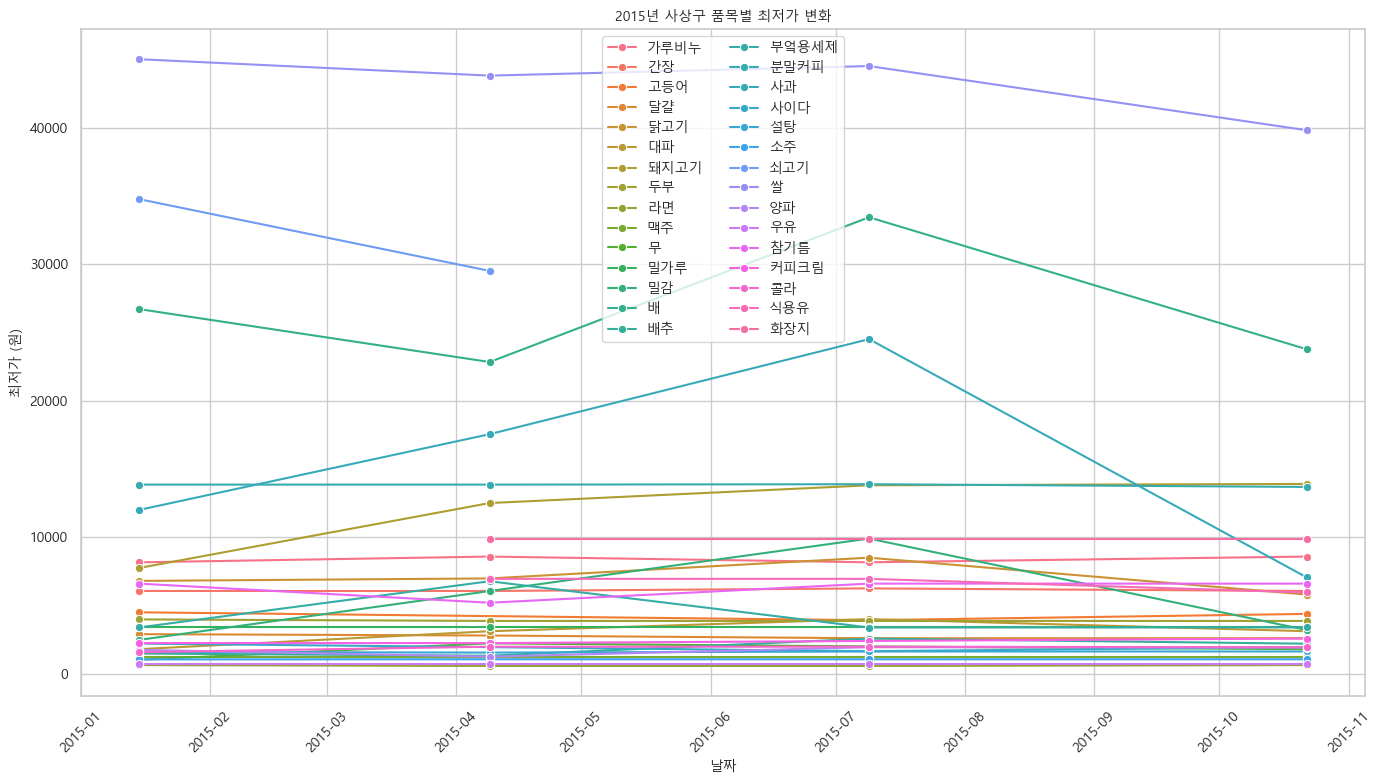

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("ÏÇ¨ÏÉÅÍµ¨2015_1q.csv")
q2 = pd.read_csv("ÏÇ¨ÏÉÅÍµ¨2015_2q.csv")
q3 = pd.read_csv("ÏÇ¨ÏÉÅÍµ¨2015_3q.csv")
q4 = pd.read_csv("ÏÇ¨ÏÉÅÍµ¨2015_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÏ†ÄÍ∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2015ÎÖÑ ÏÇ¨ÏÉÅÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÏ†ÄÍ∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÏ†ÄÍ∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("ÏÇ¨ÏÉÅÍµ¨2015_min.csv", index=False, encoding="utf-8-sig")

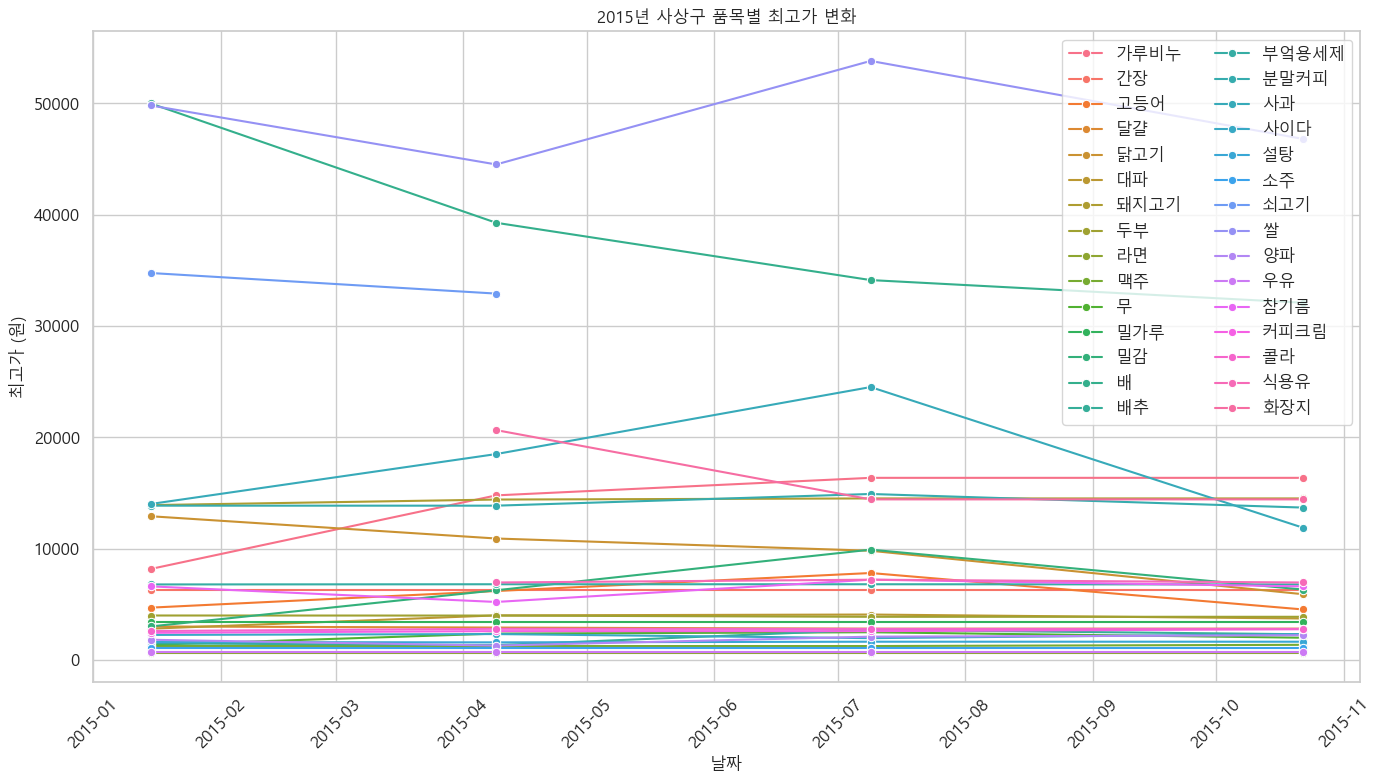

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("ÏÇ¨ÏÉÅÍµ¨2015_1q.csv")
q2 = pd.read_csv("ÏÇ¨ÏÉÅÍµ¨2015_2q.csv")
q3 = pd.read_csv("ÏÇ¨ÏÉÅÍµ¨2015_3q.csv")
q4 = pd.read_csv("ÏÇ¨ÏÉÅÍµ¨2015_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÍ≥†Í∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2015ÎÖÑ ÏÇ¨ÏÉÅÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÍ≥†Í∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÍ≥†Í∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("ÏÇ¨ÏÉÅÍµ¨2015_max.csv", index=False, encoding="utf-8-sig")